# Step 1: Reading and Understanding the Data|

In [237]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.feature_selection import RFE

In [337]:
CarPrice = pd.read_csv("D:\\Upgrad Assignments\\Machine Learning 1\\Assignment- Linear Regression\\CarPrice_Assignment.csv")

In [338]:
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [339]:
CarPrice.shape

(205, 26)

In [340]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [341]:
CarPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Step 2: Visualising numeric variables

In [342]:
numeric_data = CarPrice.select_dtypes(include = [np.number])

In [343]:
numeric_data.columns

Index([u'car_ID', u'symboling', u'wheelbase', u'carlength', u'carwidth',
       u'carheight', u'curbweight', u'enginesize', u'boreratio', u'stroke',
       u'compressionratio', u'horsepower', u'peakrpm', u'citympg',
       u'highwaympg', u'price'],
      dtype='object')

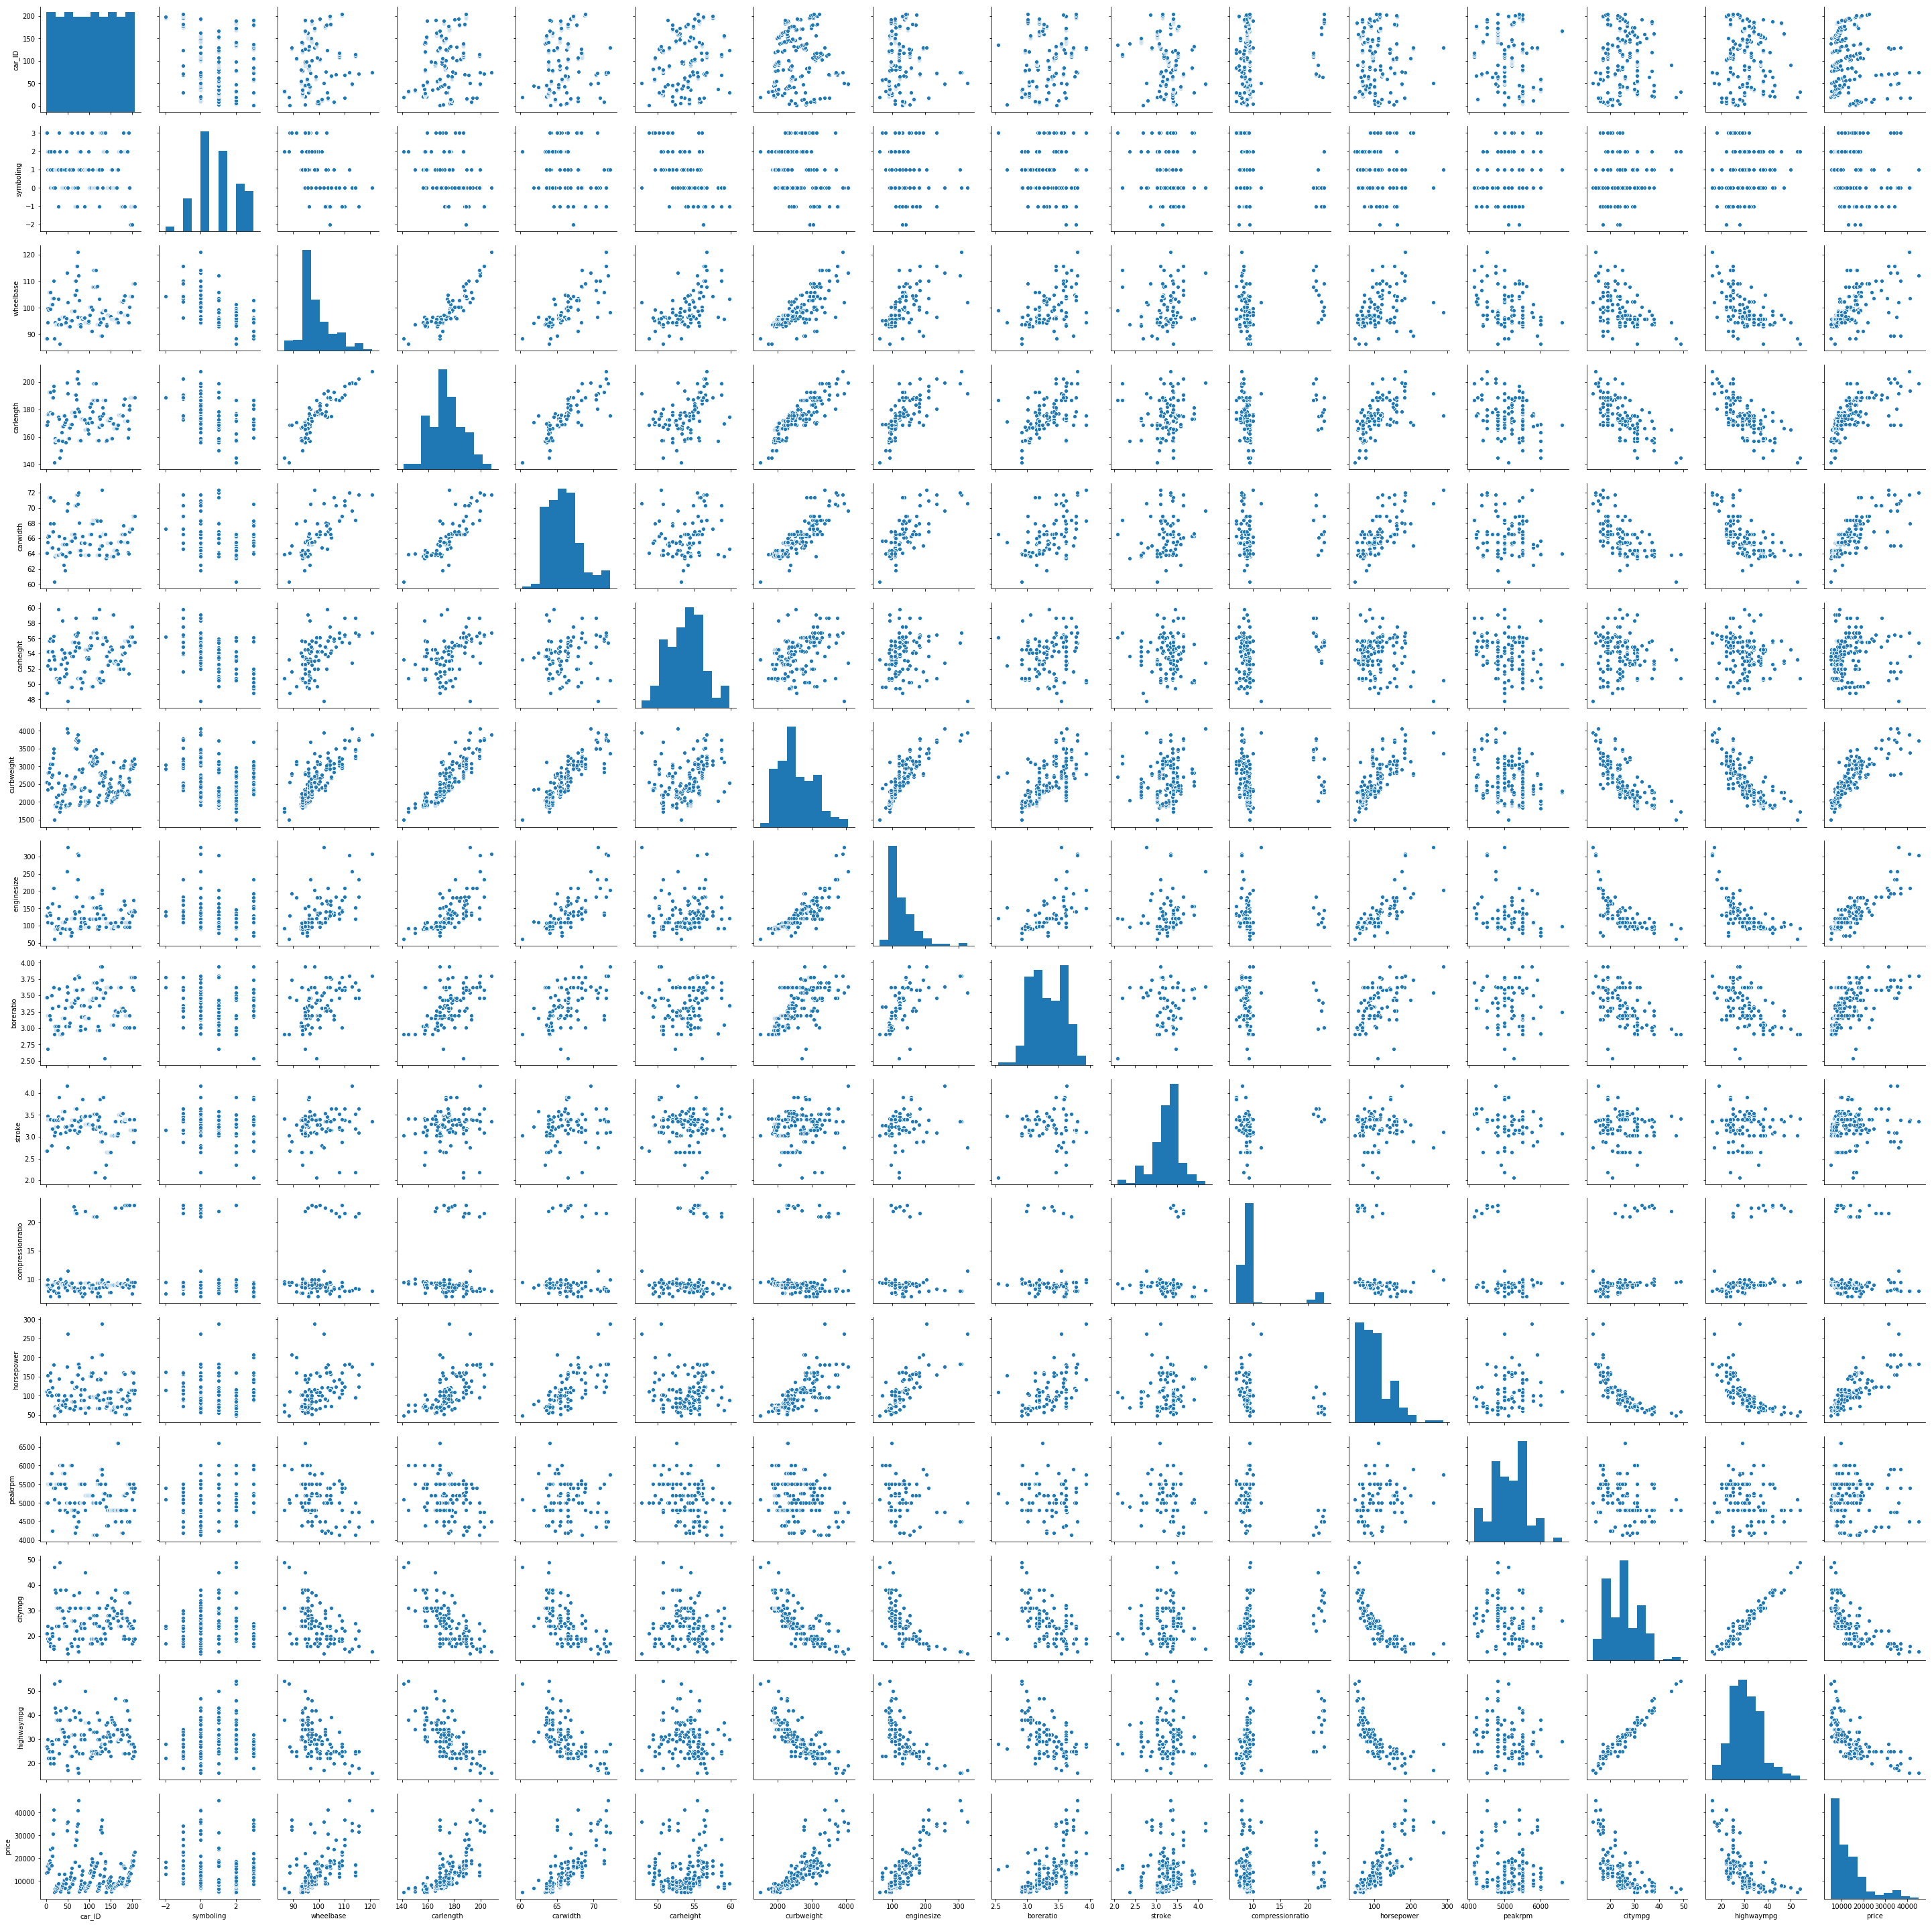

In [344]:
sns.pairplot(CarPrice)
plt.show()

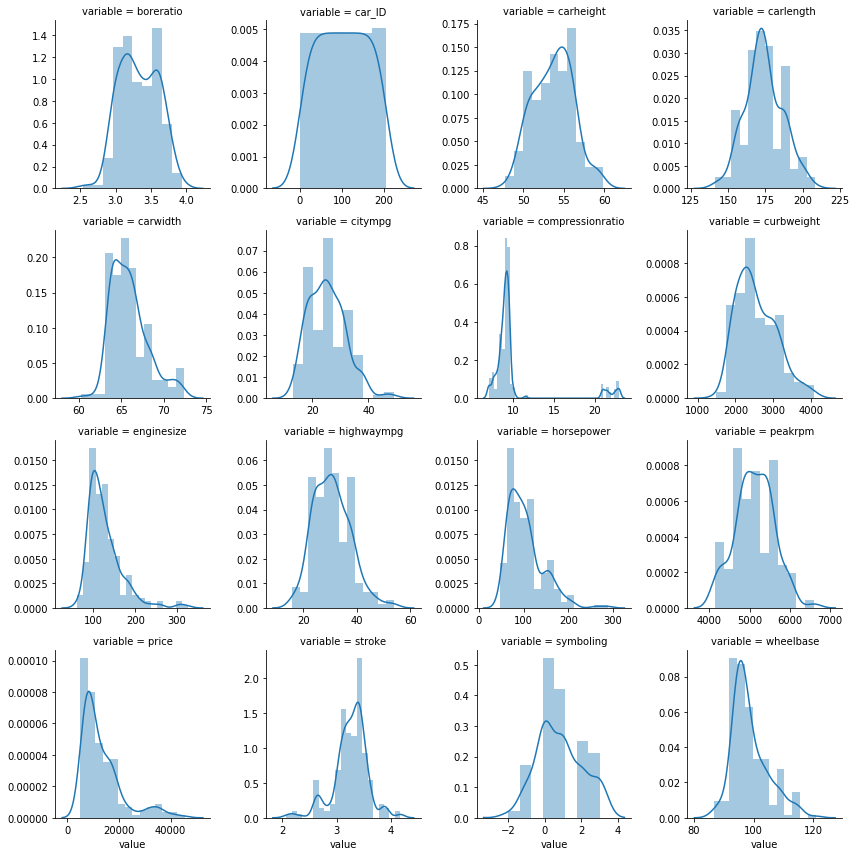

In [345]:
#Distribution of numerical features 

np.seterr(divide='ignore', invalid='ignore')
f = pd.melt(CarPrice, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

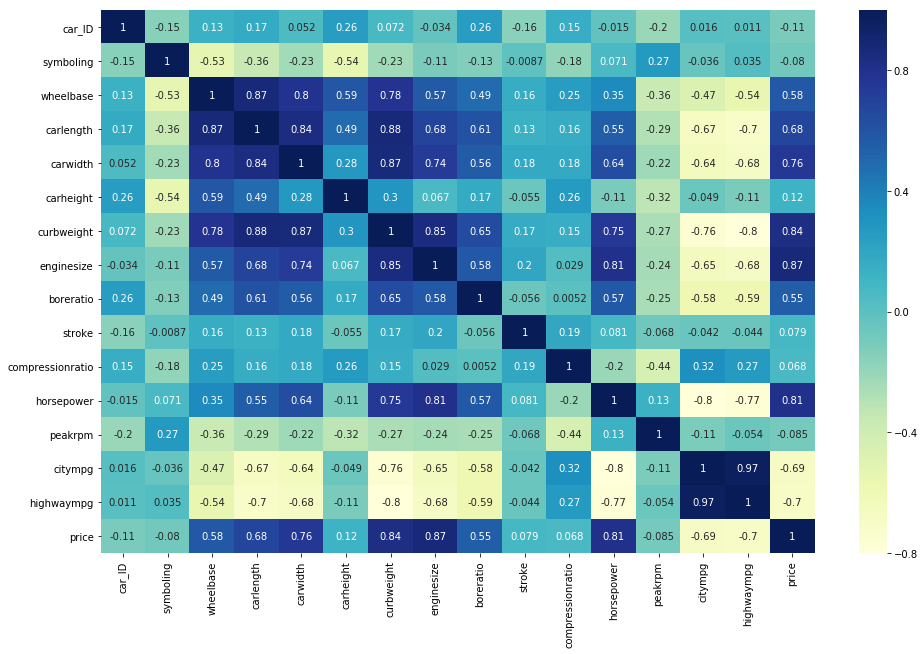

In [346]:
cor = CarPrice.corr()
plt.figure(figsize = (16, 10))
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

####  highway and city mpg's are highly correlated =  0.97
####  carlength with wheelbase = 0.87 
####  carwidth with curbweight = 0.87
####  curbweight with enginesize = 0.85
####  carlength with carwidth = 0.84
####  carlength with wheelbase = 0.87 
####  enginesize with horsepower = 0.81 

## Remove variable which are highly correlated 

In [347]:
CarPrice.drop(columns = ['carlength','carwidth','carheight','horsepower','curbweight','highwaympg','citympg'], inplace = True)

In [348]:
CarPrice.shape

(205, 19)

# Visualising Categorical Variables

In [349]:
categorical_data = CarPrice.select_dtypes(exclude = [np.number])

In [350]:
categorical_data.columns

Index([u'CarName', u'fueltype', u'aspiration', u'doornumber', u'carbody',
       u'drivewheel', u'enginelocation', u'enginetype', u'cylindernumber',
       u'fuelsystem'],
      dtype='object')

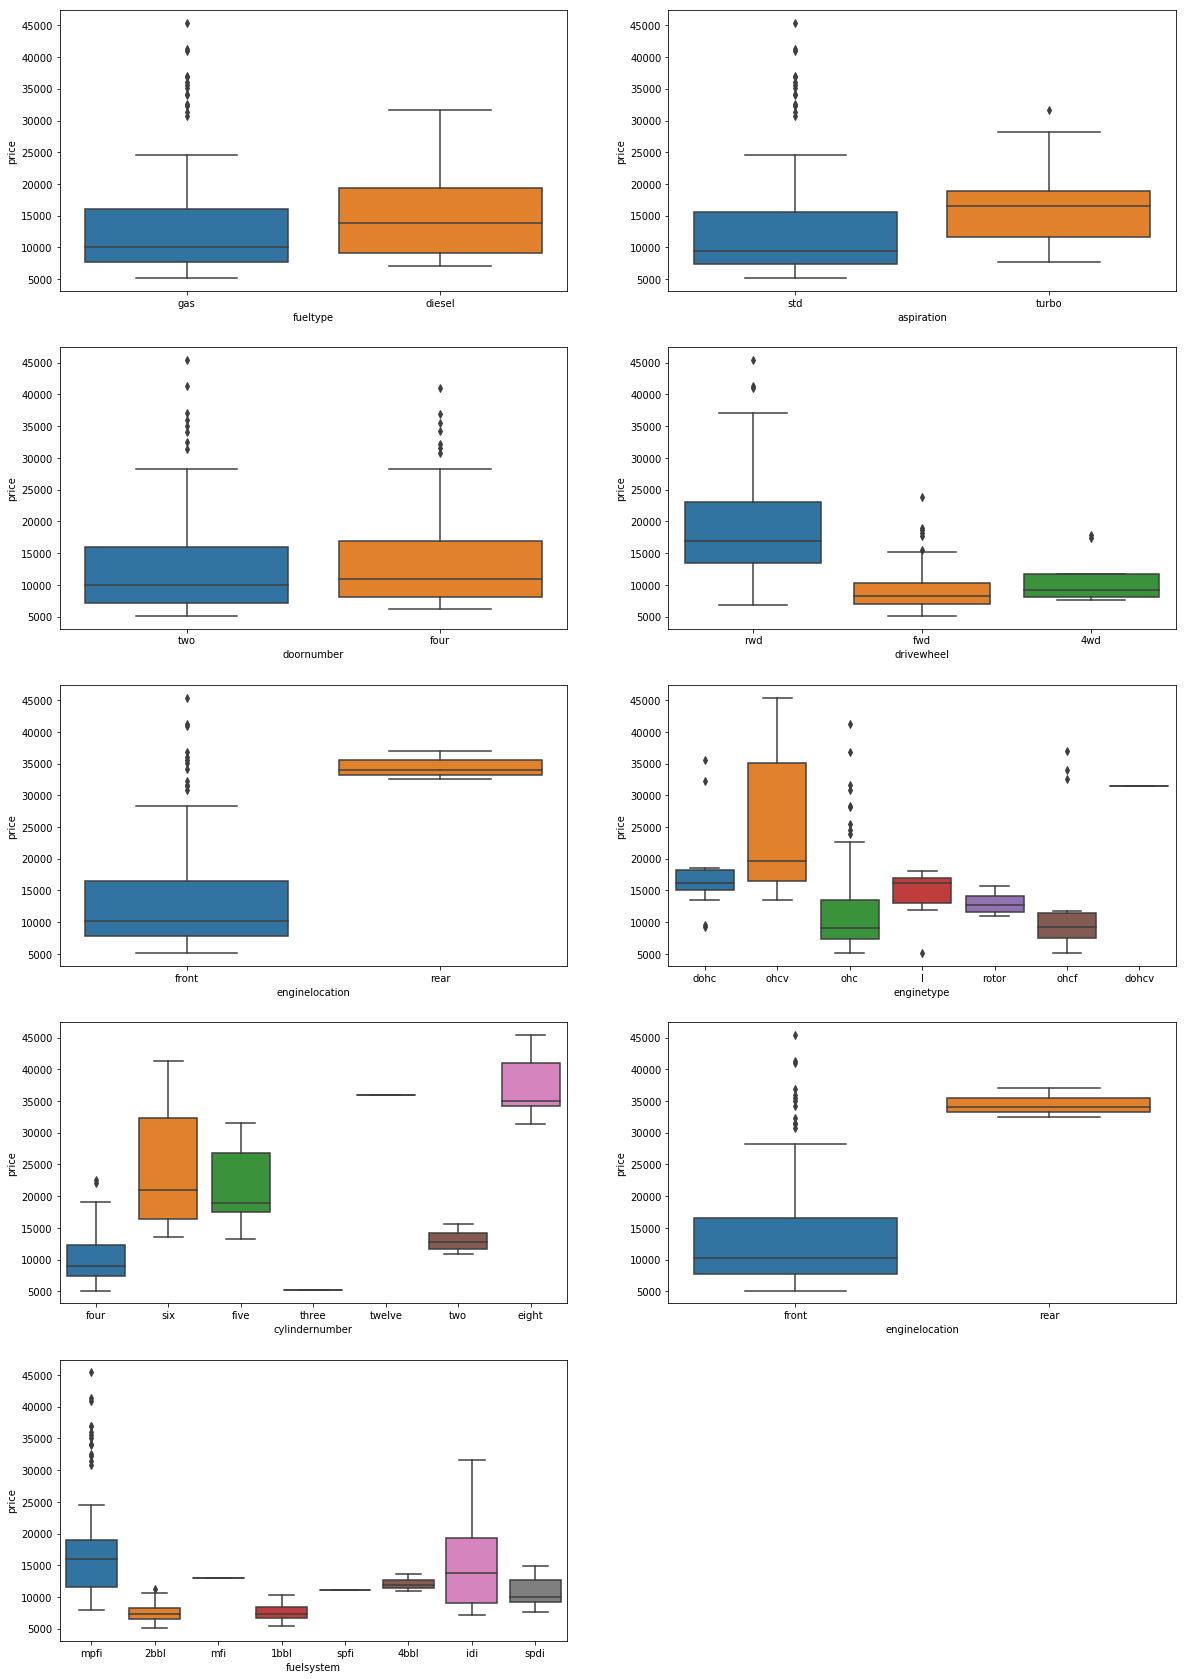

In [351]:
plt.figure(figsize=(20,30))
plt.subplot(5,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice)
plt.subplot(5,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice)
plt.subplot(5,2,3)
sns.boxplot(x = 'doornumber', y = 'price', data = CarPrice)
plt.subplot(5,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice)
plt.subplot(5,2,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice)
plt.subplot(5,2,6)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice)
plt.subplot(5,2,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice)
plt.subplot(5,2,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice)
plt.subplot(5,2,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = CarPrice)
plt.show()

#### Number of gas fueled cars are more than diesel.
#### OHCV engin type having more rows ,it seems to be most favored type while OHC and OHCF have the low price range.
#### six cylinder is also having more row

# Step 3: Data Preparation

#### Coverting categorical feature columns to numerical for data analysis

In [352]:
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,dohc,four,130,mpfi,3.47,2.68,9.0,5000,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,dohc,four,130,mpfi,3.47,2.68,9.0,5000,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,ohcv,six,152,mpfi,2.68,3.47,9.0,5000,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,ohc,four,109,mpfi,3.19,3.40,10.0,5500,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,ohc,five,136,mpfi,3.19,3.40,8.0,5500,17450.0


In [353]:
CarPrice_name = CarPrice["CarName"].str.split(" ", n = 1, expand = True) 

In [354]:
CarPrice_name.head()

,0,1
0,alfa-romero,giulia
1,alfa-romero,stelvio
2,alfa-romero,Quadrifoglio
3,audi,100 ls
4,audi,100ls


In [355]:
CarPrice["CarName"]= CarPrice_name[0]

In [356]:
#There seems to be some spelling error in the CarName column.

In [357]:
CarPrice.CarName.replace({'maxda':'mazda','Nissan':'nissan', 'porcshce' : 'porsche', 'toyouta' : 'toyota', 'vokswagen' : 'volkswagen', 'vw' : 'volkswagen', 'vw dasher' : 'volkswagen'} ,regex=True, inplace=True)
CarPrice.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [358]:
Car_Name = {
    'cheverolet' : 'low_budget','dodge' : 'low_budget','plymouth' : 'low_budget',
    'honda' : 'low_budget','subaru' : 'low_budget','isuzu' : 'low_budget',
    'mitsubishi' : 'low_budget','renault' : 'low_budget','toyota' : 'low_budget',
    'volkswagen' : 'medium_budget','nissan' : 'medium_budget','mazda' : 'medium_budget',
    'saab' : 'medium_budget','peugeot' : 'medium_budget','alfa-romero' : 'medium_budget',
    'mercury' : 'medium_budget','audi' : 'luxury_car','volvo' : 'luxury_car',
    'bmw' : 'luxury_car','buick' : 'luxury_car','porsche' : 'luxury_car',
    'jaguar' : 'luxury_car',
    }
CarPrice['Car_Name'] = CarPrice['CarName'].map(Car_Name)
# Dropping the orignal car_company variable
CarPrice.drop('CarName',axis=1,inplace=True)
CarPrice.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,price,Car_Name
0,1,3,gas,std,two,convertible,rwd,front,88.6,dohc,four,130,mpfi,3.47,2.68,9.0,5000,13495.0,medium_budget
1,2,3,gas,std,two,convertible,rwd,front,88.6,dohc,four,130,mpfi,3.47,2.68,9.0,5000,16500.0,medium_budget
2,3,1,gas,std,two,hatchback,rwd,front,94.5,ohcv,six,152,mpfi,2.68,3.47,9.0,5000,16500.0,medium_budget
3,4,2,gas,std,four,sedan,fwd,front,99.8,ohc,four,109,mpfi,3.19,3.40,10.0,5500,13950.0,luxury_car
4,5,2,gas,std,four,sedan,4wd,front,99.4,ohc,five,136,mpfi,3.19,3.40,8.0,5500,17450.0,luxury_car


### Dummy Variables

In [359]:
dummy_CarName = pd.get_dummies(CarPrice['Car_Name'])
dummy_drivewheel = pd.get_dummies(CarPrice['drivewheel'], prefix='drivewheel_')
dummy_carbody = pd.get_dummies(CarPrice['carbody'],prefix='carbody_')
dummy_enginetypee = pd.get_dummies(CarPrice['enginetype'],prefix='enginetype_')
dummy_cylindernumbere = pd.get_dummies(CarPrice['cylindernumber'],prefix='cylindernumber_')
dummy_fuelsystem = pd.get_dummies(CarPrice['fuelsystem'],prefix='fuelsystem_')

In [360]:
CarPrice['enginelocation'].replace({'front':0, 'rear' : 1},inplace=True)
CarPrice['fueltype'].replace({'gas':0, 'diesel' : 1},inplace=True)
CarPrice['aspiration'].replace({'std':0, 'turbo' : 1},inplace=True)
CarPrice['doornumber'].replace({'four':4, 'two' : 2},inplace=True)

In [361]:
# Add the results to the original CarPrice dataframe
CarPrice = pd.concat([CarPrice, dummy_CarName,dummy_drivewheel,dummy_carbody,dummy_enginetypee,dummy_cylindernumbere], axis = 1)

                wheelbase
Car_Name                 
low_budget      96.234783
luxury_car     104.507143
medium_budget   98.894118


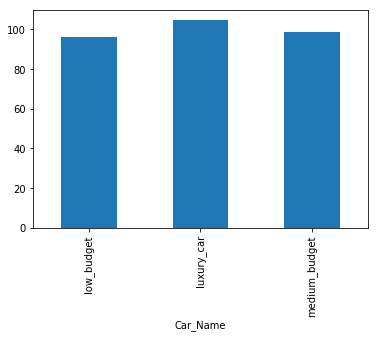

In [362]:
## Fetching two columns -: car name, wheel base
data_s = CarPrice[['Car_Name','wheelbase']]
## Grouping data
data_g = data_s.groupby(['Car_Name']).mean()
print(data_g)
## Plotting the above data 
data_g['wheelbase'].plot(kind='bar')

                      price
Car_Name                   
low_budget      8987.369565
luxury_car     25300.896833
medium_budget  11973.955882


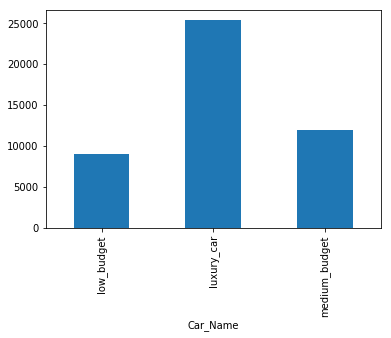

In [363]:
## Fetching two columns -: car name, price
data_price = CarPrice[['Car_Name','price']]
## Grouping data
data_p = data_price.groupby(['Car_Name']).mean()
print(data_p)
## Plotting the above data 
data_p['price'].plot(kind='bar')

#### as we can see in graph Jaguar,audi,bmw,buick,porchce having high value
#### most prices in the dataset are low(Below 15,000).

## Outilers treatment

#### keep the data in which the car price is less than 3 standard deviation.

In [364]:
CarPrice = CarPrice[np.abs(CarPrice.price-CarPrice.price.mean()) <= (3*CarPrice.price.std())]

In [365]:
CarPrice['enginesize'][np.abs(CarPrice['enginesize'] > 209.00)]= 209.00
CarPrice['compressionratio'][np.abs(CarPrice['compressionratio'] > 10.94)]= 10.94

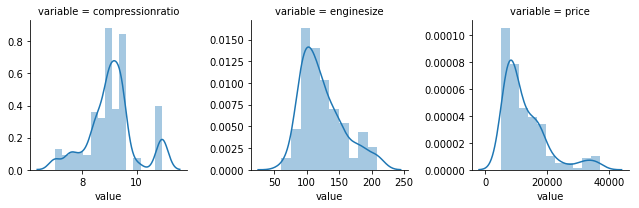

In [366]:
plot_dist = (['enginesize','compressionratio','price'])
#Distribution of numerical features 

np.seterr(divide='ignore', invalid='ignore')
f1 = pd.melt(CarPrice, value_vars=sorted(plot_dist))
g1 = sns.FacetGrid(f1, col='variable', col_wrap=4, sharex=False, sharey=False)
g1 = g1.map(sns.distplot, 'value')

                      price
Car_Name                   
low_budget      8987.369565
luxury_car     23973.401718
medium_budget  11973.955882


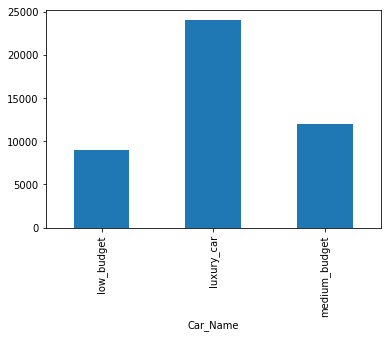

In [367]:
## Fetching two columns -: car name, price
data_price = CarPrice[['Car_Name','price']]
## Grouping data
data_p = data_price.groupby(['Car_Name']).mean()
print(data_p)
## Plotting the above data 
data_p['price'].plot(kind='bar')

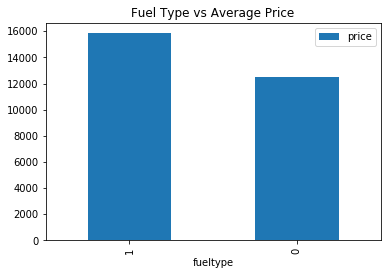

In [368]:
data_f = pd.DataFrame(CarPrice.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
data_f.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

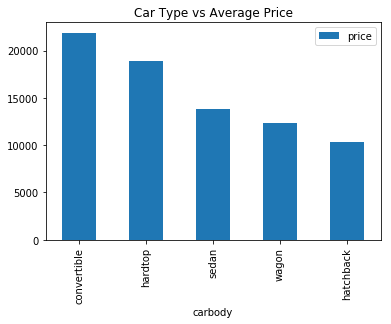

In [369]:
data_cb = pd.DataFrame(CarPrice.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
data_cb.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### hardtop and convertible have higher average price.

#### diesel has higher average price than gas.

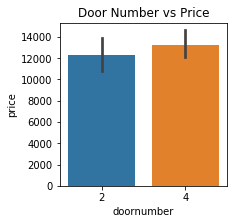

In [370]:
plt.figure(figsize=(3,3))
plt.title('Door Number vs Price')
sns.barplot(x=CarPrice.doornumber, y=CarPrice.price)
plt.show()

#### there is not much imapact of door number on price

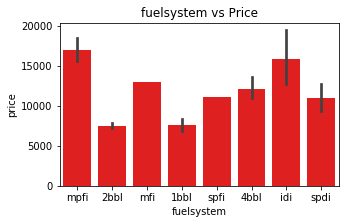

In [371]:
plt.figure(figsize=(5,3))
plt.title('fuelsystem vs Price')
sns.barplot(x=CarPrice.fuelsystem, y=CarPrice.price,color = "red")
plt.show()

#### mpfi and idi having the highest price range. 

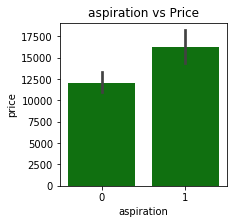

In [372]:
plt.figure(figsize=(3,3))
plt.title('aspiration vs Price')
sns.barplot(x=CarPrice.aspiration, y=CarPrice.price,color = "green")
plt.show()

#### turbo having higher price than std

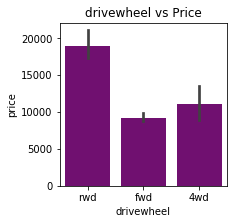

In [373]:
plt.figure(figsize=(3,3))
plt.title('drivewheel vs Price')
sns.barplot(x=CarPrice.drivewheel, y=CarPrice.price,color = "purple")
plt.show()

#### Most high ranged cars seeme to prefer rwd drivewheel.

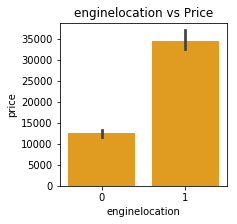

In [374]:
plt.figure(figsize=(3,3))
plt.title('enginelocation vs Price')
sns.barplot(x=CarPrice.enginelocation, y=CarPrice.price,color = "orange")
plt.show()

#### higher priced car preffere rear engin location 

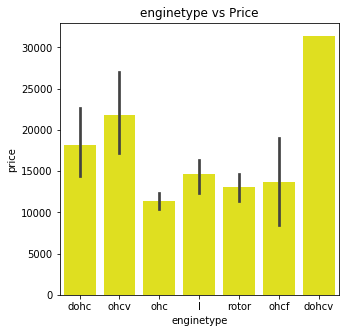

In [375]:
plt.figure(figsize=(5,5))
plt.title('enginetype vs Price')
sns.barplot(x=CarPrice.enginetype, y=CarPrice.price,color = "yellow")
plt.show()

#### as we can see in graph dohcv,ohcv having high value

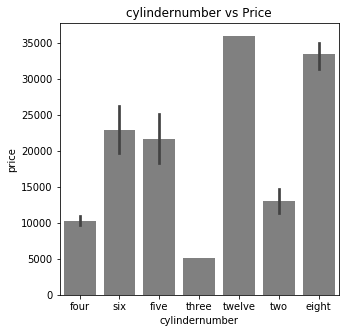

In [376]:
plt.figure(figsize=(5,5))
plt.title('cylindernumber vs Price')
sns.barplot(x=CarPrice.cylindernumber, y=CarPrice.price,color = "grey")
plt.show()

#### Most common number of cylinders are two, four, six and five.

In [377]:
CarPrice.drop(columns = ['fueltype','aspiration','doornumber','drivewheel','enginelocation','carbody','enginetype','cylindernumber','fuelsystem'], inplace = True)
CarPrice.head()

,car_ID,symboling,wheelbase,enginesize,boreratio,stroke,compressionratio,peakrpm,price,Car_Name,...,enginetype__ohcf,enginetype__ohcv,enginetype__rotor,cylindernumber__eight,cylindernumber__five,cylindernumber__four,cylindernumber__six,cylindernumber__three,cylindernumber__twelve,cylindernumber__two
0,1,3,88.6,130,3.47,2.68,9.0,5000,13495.0,medium_budget,...,0,0,0,0,0,1,0,0,0,0
1,2,3,88.6,130,3.47,2.68,9.0,5000,16500.0,medium_budget,...,0,0,0,0,0,1,0,0,0,0
2,3,1,94.5,152,2.68,3.47,9.0,5000,16500.0,medium_budget,...,0,1,0,0,0,0,1,0,0,0
3,4,2,99.8,109,3.19,3.40,10.0,5500,13950.0,luxury_car,...,0,0,0,0,0,1,0,0,0,0
4,5,2,99.4,136,3.19,3.40,8.0,5500,17450.0,luxury_car,...,0,0,0,0,1,0,0,0,0,0


In [378]:
CarPrice.columns

Index([u'car_ID', u'symboling', u'wheelbase', u'enginesize', u'boreratio',
       u'stroke', u'compressionratio', u'peakrpm', u'price', u'Car_Name',
       u'low_budget', u'luxury_car', u'medium_budget', u'drivewheel__4wd',
       u'drivewheel__fwd', u'drivewheel__rwd', u'carbody__convertible',
       u'carbody__hardtop', u'carbody__hatchback', u'carbody__sedan',
       u'carbody__wagon', u'enginetype__dohc', u'enginetype__dohcv',
       u'enginetype__l', u'enginetype__ohc', u'enginetype__ohcf',
       u'enginetype__ohcv', u'enginetype__rotor', u'cylindernumber__eight',
       u'cylindernumber__five', u'cylindernumber__four',
       u'cylindernumber__six', u'cylindernumber__three',
       u'cylindernumber__twelve', u'cylindernumber__two'],
      dtype='object')

In [379]:
CarPrice.drop(['Car_Name'], axis=1, inplace = True)
CarPrice.head()

,car_ID,symboling,wheelbase,enginesize,boreratio,stroke,compressionratio,peakrpm,price,low_budget,...,enginetype__ohcf,enginetype__ohcv,enginetype__rotor,cylindernumber__eight,cylindernumber__five,cylindernumber__four,cylindernumber__six,cylindernumber__three,cylindernumber__twelve,cylindernumber__two
0,1,3,88.6,130,3.47,2.68,9.0,5000,13495.0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,3,88.6,130,3.47,2.68,9.0,5000,16500.0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,94.5,152,2.68,3.47,9.0,5000,16500.0,0,...,0,1,0,0,0,0,1,0,0,0
3,4,2,99.8,109,3.19,3.40,10.0,5500,13950.0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,2,99.4,136,3.19,3.40,8.0,5500,17450.0,0,...,0,0,0,0,1,0,0,0,0,0


# Step 4: Splitting the Data into Training and Testing Sets

In [380]:
df_train, df_test = train_test_split(CarPrice, train_size = 0.7, test_size = 0.3, random_state = 100)
print(CarPrice.shape)
print(df_train.shape)
print(df_test.shape)

(202, 34)
(141, 34)
(61, 34)


### Rescaling the Features 

we will use MinMax scaling

In [381]:
#instantiate an object
scaler = MinMaxScaler()

In [382]:
# Apply scaler() on numeric variables
num_vars = ['symboling', 'wheelbase', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'price']

In [383]:
#Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [384]:
df_train[num_vars].describe()

,symboling,wheelbase,enginesize,boreratio,stroke,compressionratio,peakrpm,price
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.570213,0.413402,0.420979,0.559980,0.551570,0.536415,0.392387,0.247719
std,0.246039,0.198892,0.225970,0.192528,0.150278,0.229812,0.199860,0.229291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,0.243243,0.421429,0.490476,0.406091,0.265306,0.087432
50%,0.600000,0.358621,0.337838,0.550000,0.571429,0.507614,0.387755,0.175682
75%,0.800000,0.503448,0.540541,0.742857,0.633333,0.609137,0.551020,0.342548
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 5: Building a linear model

### Let's check the correlation coefficients to see which variables are highly correlated

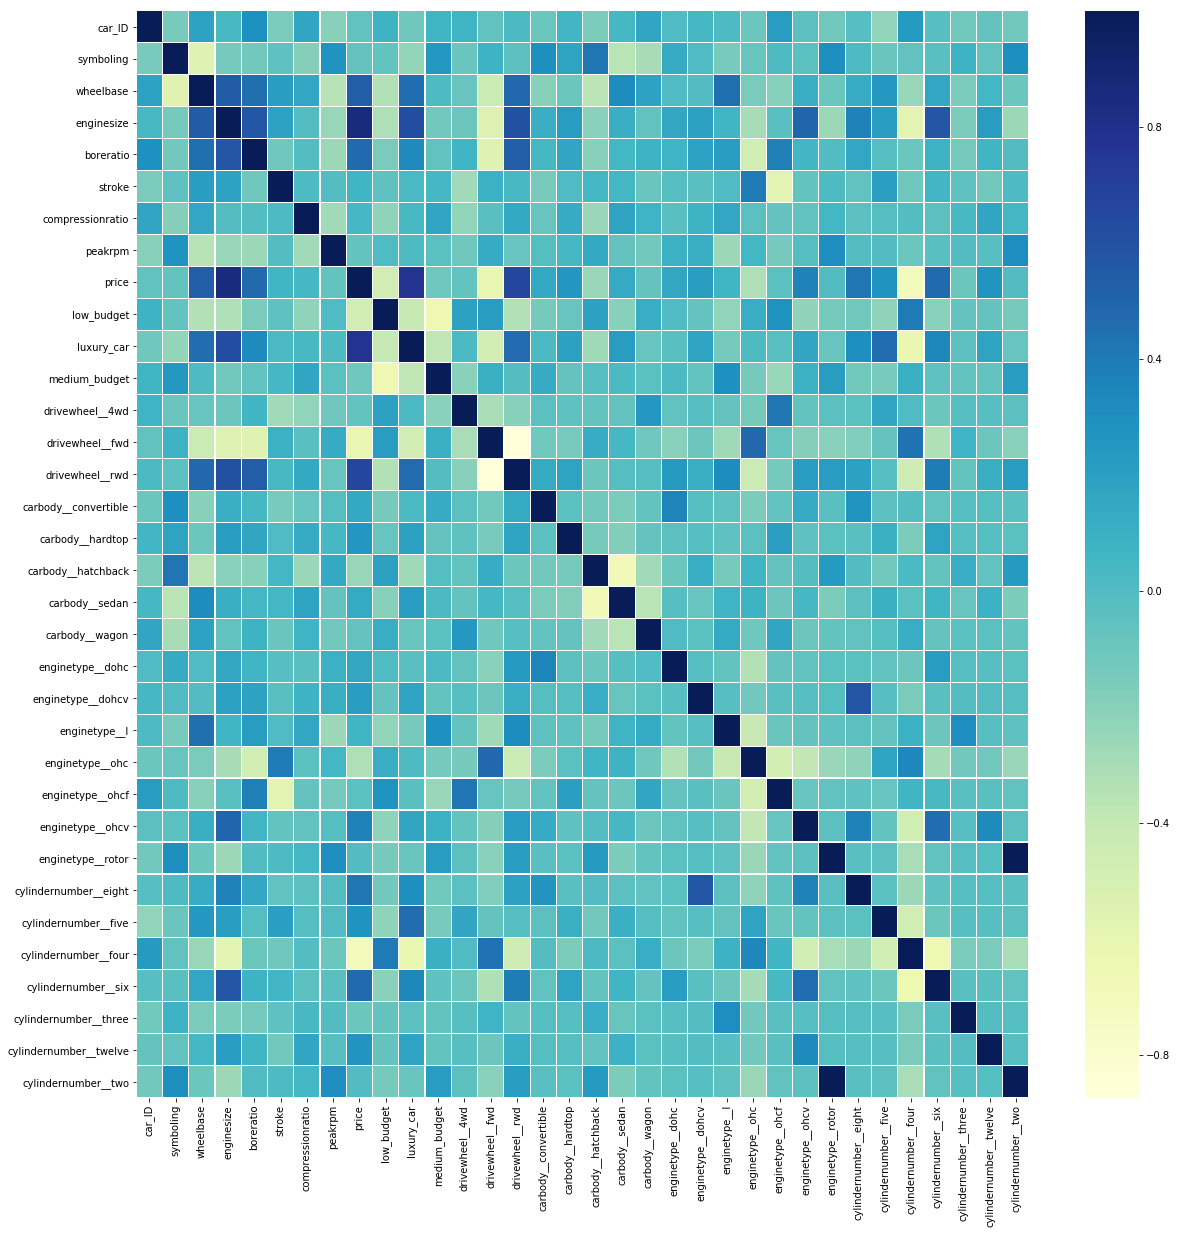

In [385]:
corr = df_train.corr()
f, ax = plt.subplots(figsize =(20,20)) 
sns.heatmap(corr, ax = ax, cmap ="YlGnBu",linewidths = 0.1)

In [386]:
corr

,car_ID,symboling,wheelbase,enginesize,boreratio,stroke,compressionratio,peakrpm,price,low_budget,...,enginetype__ohcf,enginetype__ohcv,enginetype__rotor,cylindernumber__eight,cylindernumber__five,cylindernumber__four,cylindernumber__six,cylindernumber__three,cylindernumber__twelve,cylindernumber__two
car_ID,1.000000,-0.148212,0.188688,0.038159,0.296436,-0.153535,0.166565,-0.199795,-0.060192,0.078752,...,0.219975,-0.040795,-0.122372,-0.021671,-0.226394,0.235221,-0.019680,-0.114733,-0.071087,-0.122372
symboling,-0.148212,1.000000,-0.548670,-0.131009,-0.123791,-0.051990,-0.190690,0.279115,-0.073476,-0.064968,...,0.018722,-0.039279,0.299547,0.017914,-0.086615,-0.054964,-0.029497,0.079214,-0.058677,0.299547
wheelbase,0.188688,-0.548670,1.000000,0.543415,0.445046,0.211413,0.160515,-0.349463,0.537183,-0.335319,...,-0.195150,0.110058,-0.097773,0.126850,0.252918,-0.250639,0.162944,-0.149825,0.050164,-0.097773
enginesize,0.038159,-0.131009,0.543415,1.000000,0.569552,0.188274,-0.006630,-0.248335,0.854000,-0.322381,...,-0.027928,0.492989,-0.260501,0.370300,0.213522,-0.580908,0.571096,-0.158013,0.217333,-0.260501
boreratio,0.296436,-0.123791,0.445046,0.569552,1.000000,-0.106464,-0.009829,-0.262367,0.475601,-0.153696,...,0.373162,0.056632,0.003835,0.162509,-0.016824,-0.096604,0.083792,-0.130266,0.067978,0.003835
stroke,-0.153535,-0.051990,0.211413,0.188274,-0.106464,1.000000,0.017644,-0.003803,0.069775,-0.051149,...,-0.577493,-0.062247,0.014509,-0.058592,0.209002,-0.112187,0.056689,-0.053295,-0.125860,0.014509
compressionratio,0.166565,-0.190690,0.160515,-0.006630,-0.009829,0.017644,1.000000,-0.274365,0.044000,-0.217489,...,-0.072686,-0.060495,0.054264,-0.040333,-0.012904,-0.009957,-0.041527,0.036207,0.171095,0.054264
peakrpm,-0.199795,0.279115,-0.349463,-0.248335,-0.262367,-0.003803,-0.274365,1.000000,-0.062517,0.007499,...,-0.127996,-0.012019,0.311212,-0.008466,0.002847,-0.095626,-0.026652,-0.001966,-0.019287,0.311212
price,-0.060192,-0.073476,0.537183,0.854000,0.475601,0.069775,0.044000,-0.062517,1.000000,-0.470842,...,-0.032861,0.365603,0.000799,0.417745,0.282021,-0.691530,0.478060,-0.091249,0.268026,0.000799
low_budget,0.078752,-0.064968,-0.335319,-0.322381,-0.153696,-0.051149,-0.217489,0.007499,-0.470842,1.000000,...,0.286967,-0.215096,-0.140756,-0.121456,-0.215096,0.396782,-0.203586,-0.069620,-0.069620,-0.140756


#### there is a high corelation between: carlength, curbweight, wheelbase and carwidth

In [387]:
df_train.head()

,car_ID,symboling,wheelbase,enginesize,boreratio,stroke,compressionratio,peakrpm,price,low_budget,...,enginetype__ohcf,enginetype__ohcv,enginetype__rotor,cylindernumber__eight,cylindernumber__five,cylindernumber__four,cylindernumber__six,cylindernumber__three,cylindernumber__twelve,cylindernumber__two
1,2,1.0,0.068966,0.466216,0.664286,0.290476,0.507614,0.346939,0.358353,0,...,0,0,0,0,0,1,0,0,0,0
165,166,0.6,0.272414,0.250000,0.500000,0.480952,0.609137,1.000000,0.131604,1,...,0,0,0,0,0,1,0,0,0,0
197,198,0.2,0.610345,0.540541,0.885714,0.514286,0.634518,0.510204,0.358825,0,...,0,0,0,0,0,1,0,0,0,0
169,170,0.8,0.406897,0.574324,0.771429,0.680952,0.583756,0.265306,0.153359,1,...,0,0,0,0,0,1,0,0,0,0
190,191,1.0,0.272414,0.324324,0.464286,0.633333,0.380711,0.551020,0.153076,0,...,0,0,0,0,0,1,0,0,0,0


### Dividing into X and Y sets for the model building

In [388]:
y_train = df_train.pop('price')
X_train = df_train

In [389]:
X_train.head()

,car_ID,symboling,wheelbase,enginesize,boreratio,stroke,compressionratio,peakrpm,low_budget,luxury_car,...,enginetype__ohcf,enginetype__ohcv,enginetype__rotor,cylindernumber__eight,cylindernumber__five,cylindernumber__four,cylindernumber__six,cylindernumber__three,cylindernumber__twelve,cylindernumber__two
1,2,1.0,0.068966,0.466216,0.664286,0.290476,0.507614,0.346939,0,0,...,0,0,0,0,0,1,0,0,0,0
165,166,0.6,0.272414,0.250000,0.500000,0.480952,0.609137,1.000000,1,0,...,0,0,0,0,0,1,0,0,0,0
197,198,0.2,0.610345,0.540541,0.885714,0.514286,0.634518,0.510204,0,1,...,0,0,0,0,0,1,0,0,0,0
169,170,0.8,0.406897,0.574324,0.771429,0.680952,0.583756,0.265306,1,0,...,0,0,0,0,0,1,0,0,0,0
190,191,1.0,0.272414,0.324324,0.464286,0.633333,0.380711,0.551020,0,0,...,0,0,0,0,0,1,0,0,0,0


In [390]:
y_train.head()

1      0.358353
165    0.131604
197    0.358825
169    0.153359
190    0.153076
Name: price, dtype: float64

## RFE

In [391]:
lm = LinearRegression()
lm.fit(X_train.astype(np.float64), y_train.astype(np.float64))

rfe = RFE(lm, 15)             # running RFE and selecting 15 features best describing the price of cars
rfe = rfe.fit(X_train, y_train)

In [392]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 19),
 ('symboling', False, 10),
 ('wheelbase', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 8),
 ('peakrpm', True, 1),
 ('low_budget', False, 14),
 ('luxury_car', True, 1),
 ('medium_budget', False, 4),
 ('drivewheel__4wd', False, 15),
 ('drivewheel__fwd', False, 9),
 ('drivewheel__rwd', False, 18),
 ('carbody__convertible', True, 1),
 ('carbody__hardtop', True, 1),
 ('carbody__hatchback', False, 11),
 ('carbody__sedan', False, 13),
 ('carbody__wagon', False, 12),
 ('enginetype__dohc', False, 5),
 ('enginetype__dohcv', True, 1),
 ('enginetype__l', False, 7),
 ('enginetype__ohc', False, 16),
 ('enginetype__ohcf', False, 3),
 ('enginetype__ohcv', True, 1),
 ('enginetype__rotor', False, 2),
 ('cylindernumber__eight', False, 6),
 ('cylindernumber__five', True, 1),
 ('cylindernumber__four', True, 1),
 ('cylindernumber__six', True, 1),
 ('cylindernumber__three', False, 17),
 ('cylindernumber__twelve', True,

In [393]:
columns_ref = X_train.columns[rfe.support_]
columns_ref

Index([u'wheelbase', u'enginesize', u'boreratio', u'stroke', u'peakrpm',
       u'luxury_car', u'carbody__convertible', u'carbody__hardtop',
       u'enginetype__dohcv', u'enginetype__ohcv', u'cylindernumber__five',
       u'cylindernumber__four', u'cylindernumber__six',
       u'cylindernumber__twelve', u'cylindernumber__two'],
      dtype='object')

In [394]:
columns_non_ref = X_train.columns[~rfe.support_]
columns_non_ref

Index([u'car_ID', u'symboling', u'compressionratio', u'low_budget',
       u'medium_budget', u'drivewheel__4wd', u'drivewheel__fwd',
       u'drivewheel__rwd', u'carbody__hatchback', u'carbody__sedan',
       u'carbody__wagon', u'enginetype__dohc', u'enginetype__l',
       u'enginetype__ohc', u'enginetype__ohcf', u'enginetype__rotor',
       u'cylindernumber__eight', u'cylindernumber__three'],
      dtype='object')

### Building model using statsmodel

#### Creating X_train dataframe with RFE selected variables

In [395]:
X_train_rfe_1 = X_train[columns_ref]

In [396]:
X_train_lm = sm.add_constant(X_train_rfe_1)

lr_model1 = sm.OLS(y_train, X_train_lm).fit()

lr_model1.params
print(lr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     87.00
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.44e-58
Time:                        23:12:35   Log-Likelihood:                 179.91
No. Observations:                 141   AIC:                            -327.8
Df Residuals:                     125   BIC:                            -280.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### enginetype__dohcv has a p-value = 0.404 which is very high we can drop this variable

In [397]:
X_train_rfe_1.drop(['enginetype__dohcv'], axis=1, inplace = True)

In [398]:
X_train_lm_2 = sm.add_constant(X_train_rfe_1)
lr_model2 = sm.OLS(y_train, X_train_lm_2).fit()
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     93.38
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.07e-59
Time:                        23:12:35   Log-Likelihood:                 179.51
No. Observations:                 141   AIC:                            -329.0
Df Residuals:                     126   BIC:                            -284.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### cylindernumber__twelve has a p-value = 0.125  which is very high we can drop this variable

In [399]:
X_train_rfe_1.drop(['cylindernumber__twelve'], axis=1, inplace = True)

In [400]:
X_train_lm_3 = sm.add_constant(X_train_rfe_1)
lr_model2 = sm.OLS(y_train, X_train_lm_3).fit()
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     99.30
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.54e-60
Time:                        23:12:36   Log-Likelihood:                 178.19
No. Observations:                 141   AIC:                            -328.4
Df Residuals:                     127   BIC:                            -287.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1081 

### Checking VIF
### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [401]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_1.astype(float).values, i) for i in range(X_train_rfe_1.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2).astype(float)
vif['VIF'] = (vif['VIF']).astype(float).round(2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
1,enginesize,44.13
2,boreratio,31.14
10,cylindernumber__four,25.03
3,stroke,21.14
0,wheelbase,12.66
4,peakrpm,6.25
5,luxury_car,3.47
11,cylindernumber__six,3.29
12,cylindernumber__two,3.28
9,cylindernumber__five,2.68


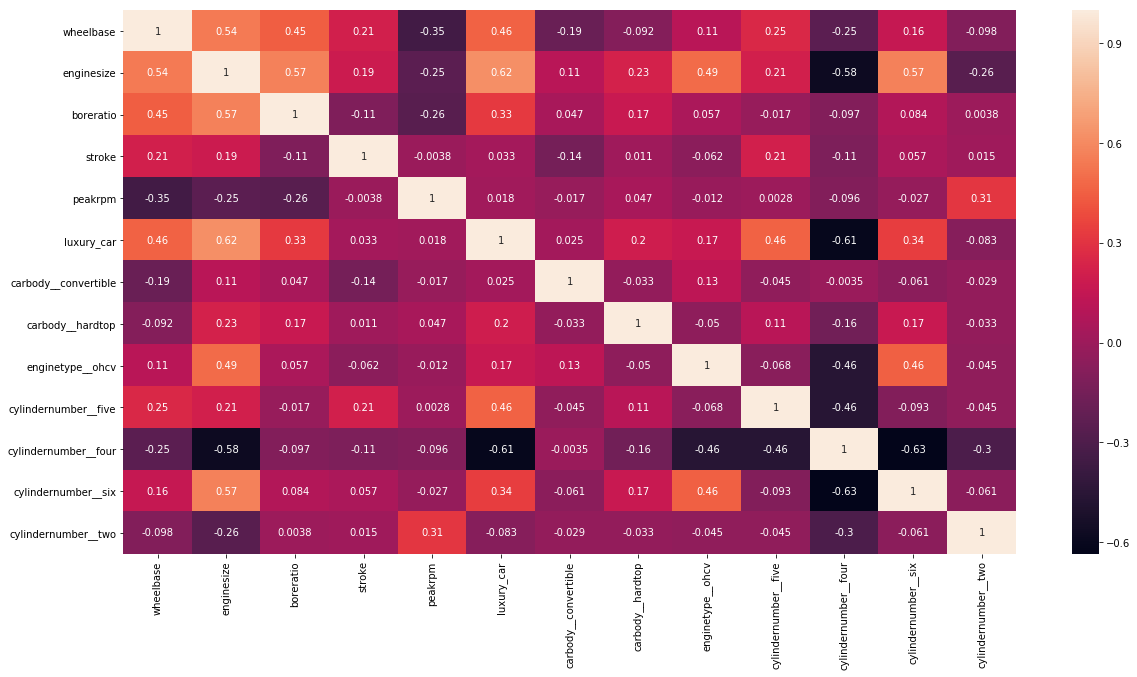

In [402]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_rfe_1.corr(),annot = True)

#### cylindernumber__four is having the VIF value  > 10 and it is strongly corelated with enginesize,luxury_car and cylindernumber__six.

In [403]:
X_train_rfe_1.drop(['cylindernumber__four'], axis=1, inplace = True)

In [404]:
X_train_lm_4 = sm.add_constant(X_train_rfe_1)
lr_model2 = sm.OLS(y_train, X_train_lm_4).fit()
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     100.4
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.07e-59
Time:                        23:12:38   Log-Likelihood:                 173.29
No. Observations:                 141   AIC:                            -320.6
Df Residuals:                     128   BIC:                            -282.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0109 

In [405]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_1.astype(float).values, i) for i in range(X_train_rfe_1.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2).astype(float)
vif['VIF'] = (vif['VIF']).astype(float).round(2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
1,enginesize,34.65
2,boreratio,18.93
3,stroke,13.52
0,wheelbase,11.37
4,peakrpm,4.99
5,luxury_car,3.06
10,cylindernumber__six,2.57
8,enginetype__ohcv,2.10
9,cylindernumber__five,1.75
11,cylindernumber__two,1.37


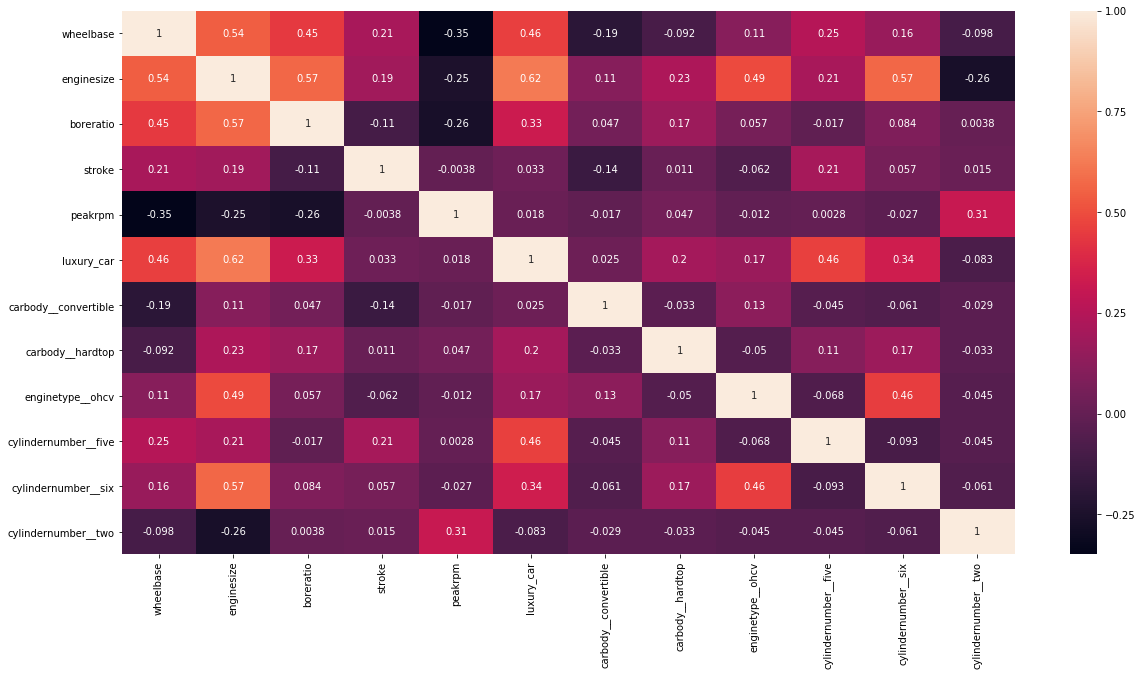

In [406]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_rfe_1.corr(),annot = True)

#### enginesize having high VIF we will remove it and see if it will make any impact on adj. R square or not

In [407]:
X_train_rfe_1.drop(['cylindernumber__five'], axis=1, inplace = True)

In [408]:
X_train_lm_5 = sm.add_constant(X_train_rfe_1)
lr_model2 = sm.OLS(y_train, X_train_lm_5).fit()
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     106.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.67e-59
Time:                        23:12:40   Log-Likelihood:                 171.03
No. Observations:                 141   AIC:                            -318.1
Df Residuals:                     129   BIC:                            -282.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0160 

In [409]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_1.astype(float).values, i) for i in range(X_train_rfe_1.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2).astype(float)
vif['VIF'] = (vif['VIF']).astype(float).round(2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
1,enginesize,33.44
2,boreratio,16.94
3,stroke,13.28
0,wheelbase,11.34
4,peakrpm,4.99
5,luxury_car,2.63
9,cylindernumber__six,2.25
8,enginetype__ohcv,2.08
10,cylindernumber__two,1.36
7,carbody__hardtop,1.31


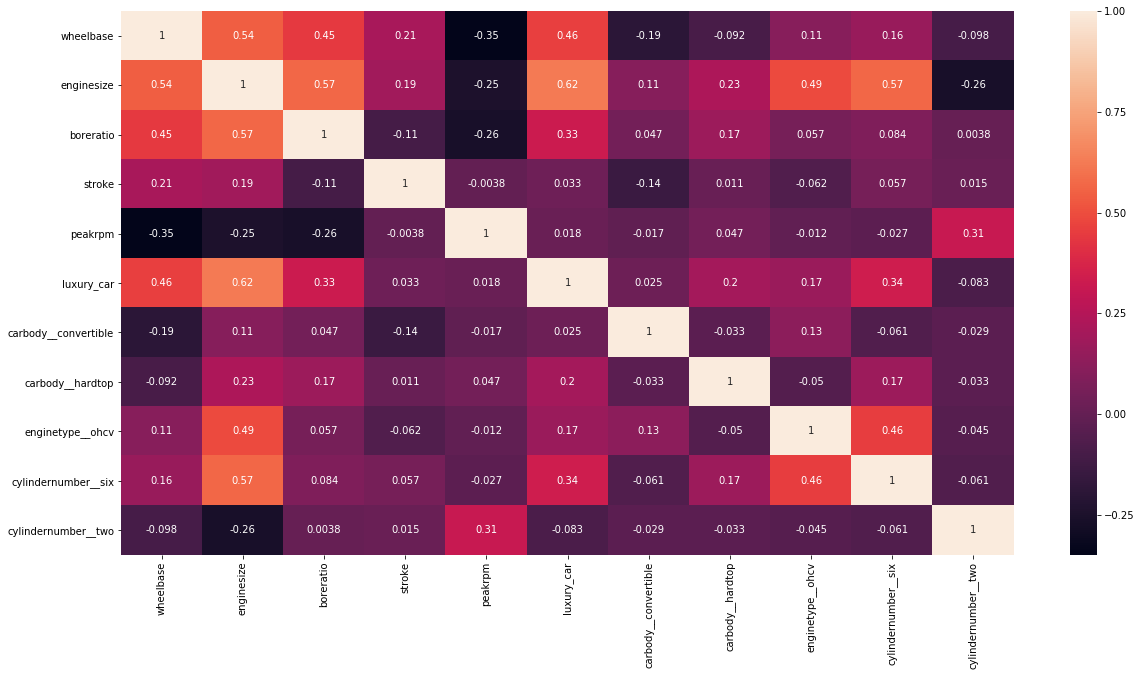

In [410]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_rfe_1.corr(),annot = True)

#### enginetype__ohcv having high p value we will remove it and see if it will make any impact on adj. R square or not

In [411]:
X_train_rfe_1.drop(['cylindernumber__six'], axis=1, inplace = True)

In [412]:
X_train_lm_6 = sm.add_constant(X_train_rfe_1)
lr_model2 = sm.OLS(y_train, X_train_lm_6).fit()
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     115.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.13e-59
Time:                        23:12:41   Log-Likelihood:                 169.68
No. Observations:                 141   AIC:                            -317.4
Df Residuals:                     130   BIC:                            -284.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0257 

In [413]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_1.astype(float).values, i) for i in range(X_train_rfe_1.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2).astype(float)
vif['VIF'] = (vif['VIF']).astype(float).round(2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
1,enginesize,24.63
2,boreratio,14.83
3,stroke,12.99
0,wheelbase,11.16
4,peakrpm,4.95
5,luxury_car,2.60
8,enginetype__ohcv,2.07
7,carbody__hardtop,1.31
9,cylindernumber__two,1.30
6,carbody__convertible,1.17


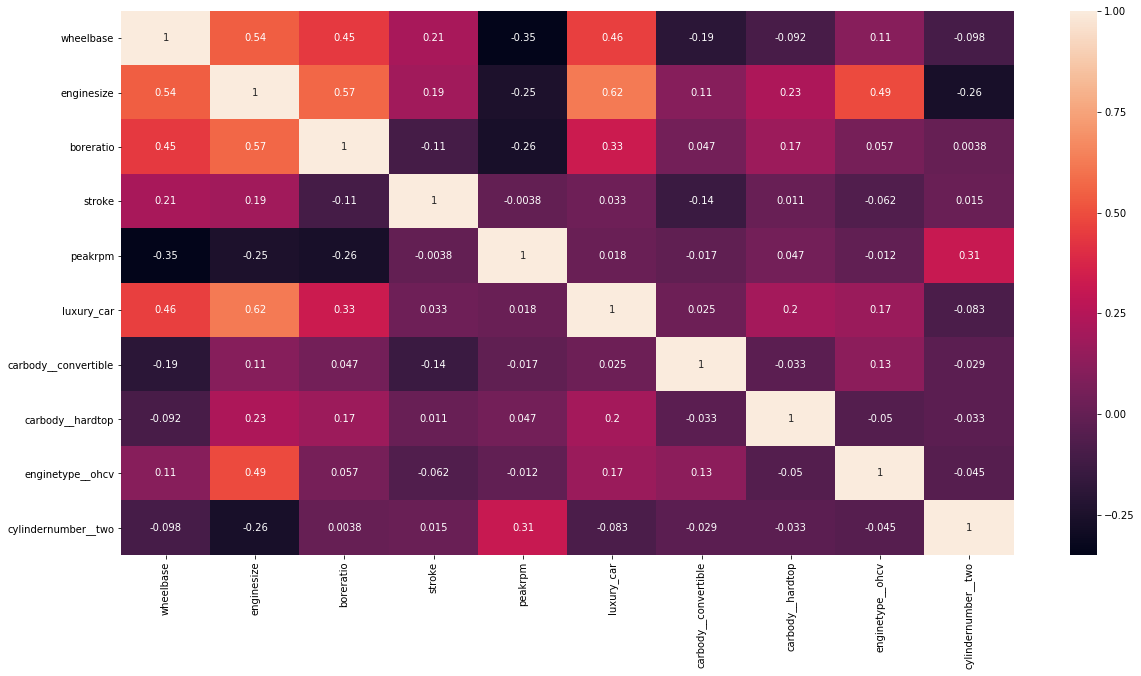

In [414]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_rfe_1.corr(),annot = True)

In [415]:
X_train_rfe_1.drop(['carbody__hardtop'], axis=1, inplace = True)

In [416]:
X_train_lm_7 = sm.add_constant(X_train_rfe_1)
lr_model2 = sm.OLS(y_train, X_train_lm_7).fit()
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.53e-60
Time:                        23:12:43   Log-Likelihood:                 167.61
No. Observations:                 141   AIC:                            -315.2
Df Residuals:                     131   BIC:                            -285.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0243 

In [417]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_1.astype(float).values, i) for i in range(X_train_rfe_1.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2).astype(float)
vif['VIF'] = (vif['VIF']).astype(float).round(2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
1,enginesize,22.80
2,boreratio,14.80
3,stroke,12.97
0,wheelbase,9.91
4,peakrpm,4.94
5,luxury_car,2.59
7,enginetype__ohcv,1.97
8,cylindernumber__two,1.30
6,carbody__convertible,1.14


In [418]:
X_train_rfe_1.drop(['peakrpm'], axis=1, inplace = True)

In [419]:
X_train_lm_8 = sm.add_constant(X_train_rfe_1)
lr_model2 = sm.OLS(y_train, X_train_lm_8).fit()
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     136.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.98e-60
Time:                        23:12:43   Log-Likelihood:                 165.20
No. Observations:                 141   AIC:                            -312.4
Df Residuals:                     132   BIC:                            -285.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0220 

In [420]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_1.astype(float).values, i) for i in range(X_train_rfe_1.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2).astype(float)
vif['VIF'] = (vif['VIF']).astype(float).round(2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
1,enginesize,21.45
2,boreratio,13.25
0,wheelbase,9.32
3,stroke,8.09
4,luxury_car,2.42
6,enginetype__ohcv,1.88
7,cylindernumber__two,1.26
5,carbody__convertible,1.14


#### R-Squared is 0.886 which is quite a significant fit. 
#### We can conclude that these variablesare the final model predictor variables.

In [421]:
X_train_rfe_1.shape

(141, 8)

# Step 6: Residual Analysis of the train data

In [422]:
y_train_price = lr_model2.predict(X_train_lm_8)

Text(0.5,0,'Errors')

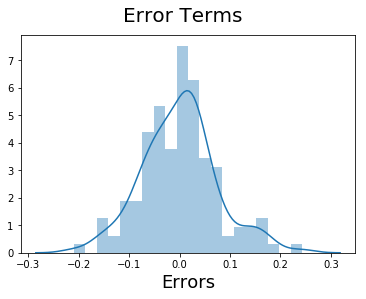

In [423]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### In above graph some error variance is present along the tails.
#### model is still not able to explain some variance.

# Step 7: Making Predictions Using the Final Model

In [424]:
# Apply scaler() on numeric variables
num_vars = ['symboling', 'wheelbase', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'price']
#Fit on data
#df_test[CarPrice_numeric_test] = scaler.transform(df_test[CarPrice_numeric_test])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [425]:
df_test.describe()

,car_ID,symboling,wheelbase,enginesize,boreratio,stroke,compressionratio,peakrpm,price,low_budget,...,enginetype__ohcf,enginetype__ohcv,enginetype__rotor,cylindernumber__eight,cylindernumber__five,cylindernumber__four,cylindernumber__six,cylindernumber__three,cylindernumber__twelve,cylindernumber__two
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,...,61.000000,61.000000,61.0,61.0,61.000000,61.000000,61.000000,61.0,61.0,61.0
mean,111.147541,0.563934,0.409893,0.423460,0.559251,0.591803,0.504951,0.417531,0.232683,0.573770,...,0.032787,0.032787,0.0,0.0,0.032787,0.852459,0.114754,0.0,0.0,0.0
std,57.138964,0.262064,0.201226,0.214661,0.190315,0.147778,0.218499,0.181184,0.221210,0.498632,...,0.179556,0.179556,0.0,0.0,0.179556,0.357588,0.321370,0.0,0.0,0.0
min,4.000000,0.000000,0.000000,0.121622,0.264286,0.057143,0.000000,0.020408,0.008532,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,67.000000,0.400000,0.272414,0.250000,0.435714,0.514286,0.406091,0.265306,0.082489,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0
50%,119.000000,0.600000,0.341379,0.398649,0.521429,0.580952,0.507614,0.428571,0.142340,1.000000,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0
75%,164.000000,0.800000,0.544828,0.540541,0.742857,0.661905,0.609137,0.551020,0.364492,1.000000,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0
max,201.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.004660,1.000000,...,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0


#### Dividing into X_test and y_test

In [426]:
y_test = df_test.pop('price')
X_test = df_test

In [427]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [428]:
# Creating X_test_lm dataframe by dropping variables from X_test_lm
X_test_lm = X_test_lm.drop(["const"], axis = 1)
X_test_new = X_test[X_test_lm.columns]

In [429]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [430]:
lr_model3 = sm.OLS(y_test, X_test_new).fit()

In [431]:
# Making predictions
y_pred = lr_model3.predict(X_test_new)

# Step 8: Model Evaluation

Text(0,0.5,'y_pred')

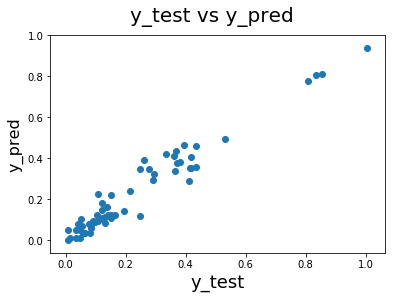

In [432]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

#### y_test VS y_pred is observed to be almost linear with some variataion occuring.

### Calculate Root Mean Square Error (RMSE)

In [433]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

('Model RMSE:', 0.050820691765667794)


### Calculate the R-squared score on the test set

In [434]:
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

('Model r2_score:', 0.946339829421363)


### Overall, it is a pretty linear spread.

# FINAL INFERENCE

#### Adj. R-squared  = 0.886
#### r2_score	         = 0.946339829421363
#### (F-statistic)         = 136.7
#### AIC                      = -312.4
#### BIC	RMSE          = -285.9
#### RMSE                 = 0.050820691765667794

Above equation implies that how the price of the car changes with a unit change in any of these independent variable with all other variables held constant.